Let's construct the system of equations based on the diagrams of forces below.

$$ F_{1} - f_{1} - N_{0x} = M_{1}a_{1} $$
$$ T - f_{2} = M_{2}a_{2} $$
$$ -F_{1} = M_{3}a_{3x} $$
$$ 2f_{3} + T - M_{3}g = M_{3}a_{3y} $$
$$ N_{0x} - T = M_{0}a_{0} = 0 $$

Constraints(the derivation can be found in the solution of the quiz):
$$ a_{1} - a_{2} - a_{3y} = 0 $$
$$ a_{1} = a_{3x} $$

<img src="fd.png">

Let's note that
$$ f_{1} = \mu_{1}N_{1} $$
$$ f_{2} = \mu_{2}N_{2} $$
$$ f_{3} = \mu_{3}F_{1} $$
are forces emerged because of friction.

From the system of equations above, we can find $F_{1}(t)$ and $ x_{1}(t), x_{2}(t), y_{3}(t)$. Having the mentioned functions. We will be able to calculate their values at a given time $t$.

In [1]:
import numpy as np

In [186]:
M1 = 10
M2 = 5
M3 = 3
mu1 = 0.09
mu2 = 0.3
mu3 = 0.4
g = 10

# General solution of the system

In [187]:
# The system of linear equations (see images calcs1.jpeg and calcs2.jpeg for more detail)
A = np.array([[-(M1 + M3), -M2], [-(2*mu3*M3 + M3), M2 + M3]])
b = np.array([[M2*mu2*g + M1*mu1*g + M2*mu1*g, M3*g - M2*mu2*g]])

In [188]:
# Solve
a = np.linalg.inv(A).dot(b.T)
a = np.squeeze(a)

In [189]:
a1 = [a[0], 0]
a2 = [a[1], 0]
a3 = [a1[0], a[0] - a2[0]]

a1, a2, a3

([-2.312977099236641, 0],
 [0.3137404580152672, 0],
 [-2.312977099236641, -2.6267175572519084])

# Our problem

In [190]:
# I don't really get why we need to get F as an inpuy if we can find it from the system of linear equations I presented above
# but anyways, in that case a1 = -F/M3 and a2 = (T - mu2*M2*g)/M2, where T = F - mu1*g*(M1 + M2) - M1*a1
def compute_accelerations(F):
    a1 = -F/M3
    T =  F - mu1*g*(M1 + M2) - M1*a1
    a2 = (T - mu2*M2*g)/M2
    
    a1 = [a1, 0]
    a2 = [a2, 0]
    a3 = [a1[0], a1[0] - a2[0]]
    
    return a1, a2, a3
    

In [191]:
# Just an example of t and F, it should be changed by the data on which the program should work
t = np.linspace(1, 20, 30)
F = np.random.random(30)*(-1) + 300

In [192]:
t

array([ 1.        ,  1.65517241,  2.31034483,  2.96551724,  3.62068966,
        4.27586207,  4.93103448,  5.5862069 ,  6.24137931,  6.89655172,
        7.55172414,  8.20689655,  8.86206897,  9.51724138, 10.17241379,
       10.82758621, 11.48275862, 12.13793103, 12.79310345, 13.44827586,
       14.10344828, 14.75862069, 15.4137931 , 16.06896552, 16.72413793,
       17.37931034, 18.03448276, 18.68965517, 19.34482759, 20.        ])

In [193]:
v1 = 0; v2 = 0; v3 = 0
x1 = [0, 0]
x2 = [0, 0]
x3 = [0, 0]

In [194]:
positions = []
for i in range(len(t)):
    a1, a2, a3 = compute_accelerations(F[i])
    x1[0] += v1*t[i] + a1[0]*(t[i]**2)/2
    v1 += a1[0]*t[i]
    x2[0] += v2*t[i] + a2[0]*(t[i]**2)/2
    v2 += a2[0]*t[i]
    x3[0] = x1[0]
    x3[1] += v3*t[i] + a3[1]*(t[i]**2)/2
    v3 += a3[1]*t[i]
    positions.append([x1.copy(), x2.copy(), x3.copy()])

In [195]:
import matplotlib.pyplot as plt

In [196]:
positions = np.array(positions)

Text(0.5, 1.0, 'M1s positions')

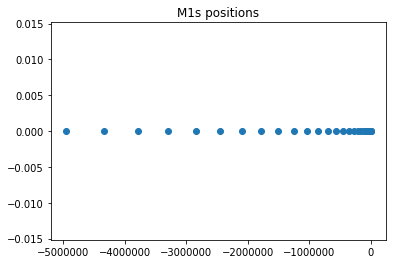

In [197]:
x1s = positions[:,0,:]

x1s_x = x1s[:, 0]
x1s_y = x1s[:, 1]

plt.scatter(x1s_x, x1s_y)
plt.title('M1s positions')

Text(0.5, 1.0, 'M2s positions')

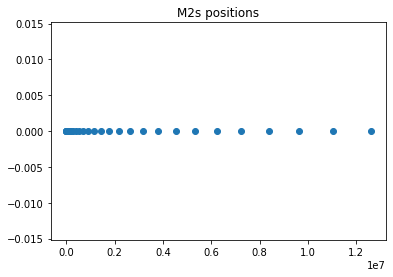

In [198]:
x1s = positions[:,1,:]

x1s_x = x1s[:, 0]
x1s_y = x1s[:, 1]

plt.scatter(x1s_x, x1s_y)
plt.title('M2s positions')

Text(0.5, 1.0, 'M3s positions')

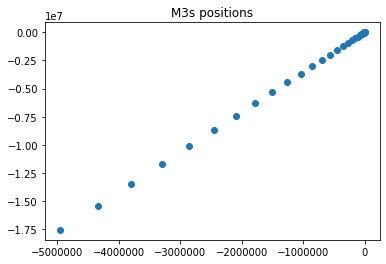

In [199]:
x1s = positions[:,2,:]

x1s_x = x1s[:, 0]
x1s_y = x1s[:, 1]

plt.scatter(x1s_x, x1s_y)
plt.title('M3s positions')